# Project: Investigate a Dataset - [No-Show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
In this project, the no-show appointments dataset would be analysed. This dataset contains information from 100,000 medical appointments in Brazil and is concerned with the issue of whether or not patients show up for their scheduled appointment. Each row contains information regarding various patient traits (and personal information) and appointment information. The patient traits includes their age, gender, ID, and whether or not they have a certain scholarship, hypertension, diabetes, alcoholism, or are handicap. The appointment information are the ID, hospital/clinic neighbourhood, scheduled day, appointment day, SMS reminders, and whether or not the appointment was graced by the patient. We dive deep into the data to see if these factor influence the appearance of the patient at the appointments or otherwise.

### Question(s) for Analysis
The questions we would analyze in this work are:
- What is the age distribution of patients who did not show up for their appointment? Which age groups are most likely to show up?
- In which location is the patients most likely to show up for their appointments?
- In which month is the highest number of missed appointments? In which day of the week do patients mostly show up for their appointments?
- Do people with health conditions such as hypertension, diabetes etc show up more frequently for their medical appointments?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Dataframe contains 110527 rows and 14 columns. Next is to check the descriptive statistics and feature infomation of dataframe

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The minimum age in the dataframe is -1. This is weird, we expect that a person's age should be non-negative. We look to remove this data and every other rows with negative ages during the data cleaning step.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing data in any row

In [8]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df['Neighbourhood'].nunique()

81

There are 81 neighbourhoods, it is what noting which neighborhood have the least and highest no-shows? Finding the the proportion of no-shows is also useful.

In [10]:
df['Age'].nunique()

104

Analysing the age distribution of no shows and those that show up is also interesting to look up

In [11]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

**Knowing what gender is most likely not to show up can also be checked.** This also applies to Alcoholism, Hypertension, and other binary features. **Do people who receive SMS have a higher chance of showing up for appointments?**

In [12]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])


### Data Cleaning

First, we start by renaming the columns for uniformity

In [13]:
#replace 'Day' with '_day' and lowercase
df.rename(columns= lambda x: x.strip().replace('Day','_day').lower(), inplace= True)
#replace 'id' with '_id'
df.rename(columns= lambda x: x.strip().replace('id','_id'), inplace= True)
#replace hyphens with underscores
df.rename(columns= lambda x: x.strip().replace('-','_'), inplace= True)

In [14]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Start by checking if there are missing data and duplicates.

In [15]:
#check for missing data in each column
df.isnull().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hipertension       0
diabetes           0
alcoholism         0
handcap            0
sms_received       0
no_show            0
dtype: int64

In [16]:
# Check for duplicated data
df.duplicated().sum()

0

There are no duplicates in the data. It has also been confirmed that there are no missing data in any column. 

In [17]:
#Are there duplicate patient IDs?
df.patient_id.duplicated().sum()

48228

In [18]:
# Any duplicated appointment IDs?
df.appointment_id.duplicated().sum()

0

Although there are 48228 duplicated patient ID, this doesn't 'stain' the data since there are no duplicates in the appointment IDs. The duplicated patient IDs implies the patients had more than on appointments when the data was collected. **It seems interesting to check the average number of times a patient make a appointment; and also the average number of times a patient failed to show up for an appointment.**


Next, we already observed that '-1' was in the age data.. we check the data from negative ages.

In [19]:
#mask the rows with negative ages
neg_age = df.query('age < 0')
neg_age

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Since only one data sample is affected by this, we can drop if off the data

In [20]:
df.drop(index = neg_age.index, inplace= True)

In [21]:
#check if dropped
df.query('age < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [22]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [23]:
df.dtypes

patient_id         float64
appointment_id       int64
gender              object
scheduled_day       object
appointment_day     object
age                  int64
neighbourhood       object
scholarship          int64
hipertension         int64
diabetes             int64
alcoholism           int64
handcap              int64
sms_received         int64
no_show             object
dtype: object

The `patient_id` are better are integers while the date features that is `scheduled_day` and `appointment_day` are better to convert to datetime features.

In [24]:
df.patient_id = df.patient_id.astype(int)
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = pd.to_datetime(df.appointment_day)

df.dtypes

patient_id                  int64
appointment_id              int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hipertension                int64
diabetes                    int64
alcoholism                  int64
handcap                     int64
sms_received                int64
no_show                    object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the age distribution of patients who did not show up for their appointment? Which age groups are most likely to show up?)
To start, we make 5 age groups and analyse accordingly.

` Children: 0-12, Teenages: 13-19, Youths: 20-39, Adults: 40-69, Seniors: >69`

Text(0.5,0,'Age group')

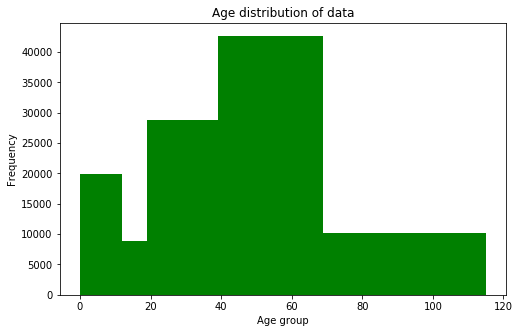

In [25]:
bins = [0, 12, 19, 39, 69, 115]
df.age.plot(kind = 'hist', bins = bins, figsize = (8,5), title = 'Age distribution of data', color = 'g')
plt.xlabel('Age group')
# plt.grid()

Text(0.5,0,'Age group')

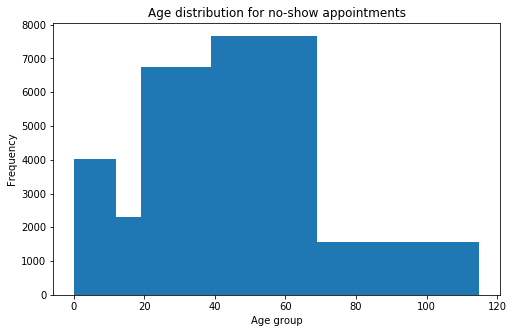

In [26]:
df.query('no_show == "Yes"').age.plot(kind = 'hist', bins = bins, figsize = (8,5), title= 'Age distribution for no-show appointments')
plt.xlabel('Age group')

In [27]:
#make age group column

def age_group(x):
    #children
    if 0 <= x <= 12:
        return 0
    #Teenagers
    elif 12 < x <= 19:
        return 1
    #Youths
    elif 19 < x <= 39:
        return 2
    elif 39 < x <=69:
        return 3
    elif 69 < x:
        return 4

df['age_group'] = df.age.apply(age_group)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_group
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,3
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,3
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,3
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,3


In [28]:
#count patients in each age group
age_group_counts = df.age_group.value_counts()
age_group_counts

3    41948
2    28870
0    21036
1     9375
4     9297
Name: age_group, dtype: int64

In [29]:
#number of appointments in age group for no-show appointment and otherwise
age_group_no_show = df.groupby(['age_group', 'no_show']).appointment_id.count()
age_group_no_show 

age_group  no_show
0          No         16729
           Yes         4307
1          No          6941
           Yes         2434
2          No         22190
           Yes         6680
3          No         34502
           Yes         7446
4          No          7845
           Yes         1452
Name: appointment_id, dtype: int64

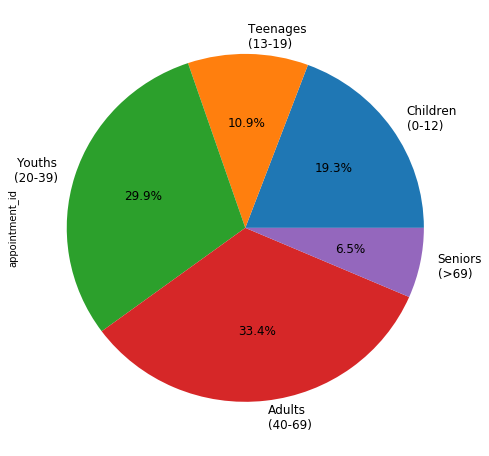

In [30]:
#plot distribution of age group in no-show
labels = ['Children\n(0-12)', 'Teenages\n(13-19)', 'Youths\n(20-39)', 'Adults\n(40-69)', 'Seniors\n(>69)']
age_group_no_show.loc[:,"Yes"].plot(kind = 'pie', 
                                    labels = labels,
                                   figsize = (8,8), fontsize = 12, autopct='%1.1f%%') #/ age_group_counts

In [31]:
#get proportion of no-show in each age group
props = age_group_no_show.loc[:,"Yes"]/ age_group_counts
props

0    0.204744
1    0.259627
2    0.231382
3    0.177505
4    0.156179
dtype: float64

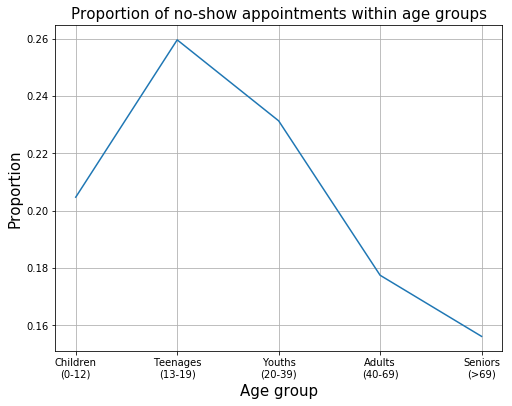

In [32]:
plt.figure(figsize= (8,6))
props.plot(kind = 'line');
plt.xticks(np.arange(5),labels);
plt.grid()
plt.xlabel('Age group', fontsize = 15);
plt.ylabel('Proportion', fontsize = 15);
plt.title('Proportion of no-show appointments within age groups', fontsize = 15);

The 5th age group `Seniors ( >69)` has the least proportion of no-show appointments. On the other hand, the 2nd age group `Teenagers (13-19)` has the highest proportion of no-show appointments; this implies the Adults has higher probability of showing up for appointments. This maybe due to the fact that they need regulate checkup due to their old age and likelihood of having health condition. We would consider how health condition might influence showing up for medical appointments.

## Research Question 2 (In which location is the patients most likely to show up for their appointments)

In [33]:
df.neighbourhood.nunique()

81

There are 81 neighbourhoods in total. We get the proportion of appointments in each neighbourhood (no show and otherwise)

In [34]:
df_locs = df.groupby(['no_show', 'neighbourhood']).patient_id.count()
df_locs = df_locs.reset_index()
df_locs_sums = df_locs.groupby(['neighbourhood']).patient_id.sum()
df_locs_2 = df_locs_sums.reset_index()
df_locs_2.rename({'patient_id': 'total_patient'}, axis = 1, inplace= True)
df_locs_2.head()

,neighbourhood,total_patient
0,AEROPORTO,8
1,ANDORINHAS,2262
2,ANTÔNIO HONÓRIO,271
3,ARIOVALDO FAVALESSA,282
4,BARRO VERMELHO,423


In [35]:
df_locs_3 = pd.merge(df_locs, df_locs_2, how= 'inner', on= 'neighbourhood')
df_locs_3['proportion'] = df_locs_3.patient_id/df_locs_3.total_patient
df_locs_3.head()

,no_show,neighbourhood,patient_id,total_patient,proportion
0,No,AEROPORTO,7,8,0.875000
1,Yes,AEROPORTO,1,8,0.125000
2,No,ANDORINHAS,1741,2262,0.769673
3,Yes,ANDORINHAS,521,2262,0.230327
4,No,ANTÔNIO HONÓRIO,221,271,0.815498


In [36]:
#check for the neighourhood with limited number of data
df_locs_3.query('total_patient < 5')

,no_show,neighbourhood,patient_id,total_patient,proportion
100,No,PARQUE INDUSTRIAL,1,1,1.0
159,Yes,ILHAS OCEÂNICAS DE TRINDADE,2,2,1.0


The neighbourhoods `PARQUE INDUSTRIAL` and `ILHAS OCEANICAS DE TRINDADE` have 1 and 2 appointments respectively. The patient in `PARQUE INDUSTRIAL` didn't miss the appointment, while the patients at `ILHAS OCEÂNICAS DE TRINDADE` failed to grace the appointment. Because these are really small data from these neighbourhood, we might have to neglect these neighbourhoods in the subsequent analysis.

Next, we check the top-15 and least-15 noshow appointment neighbourhoods.

Text(0.5,0,'Proportion')

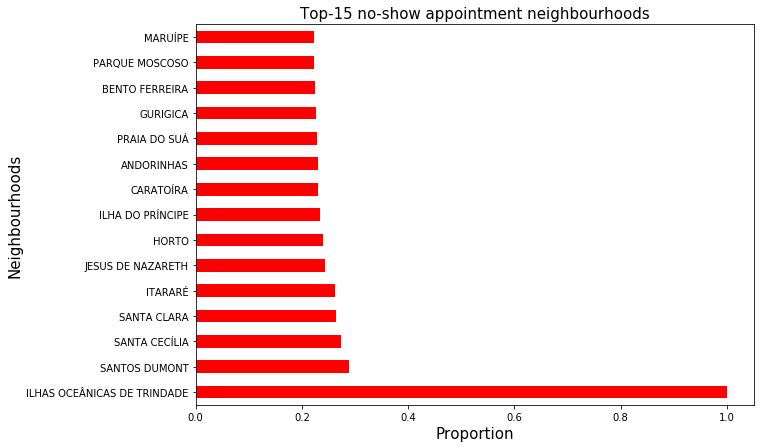

In [37]:
#Top no-show appointment neighbourhoods
df_locs_3.set_index('neighbourhood').query('no_show == "Yes"')['proportion'].nlargest(15).plot.barh(figsize = (10,7), color= 'r')
# plt.grid()
plt.title('Top-15 no-show appointment neighbourhoods', fontsize = 15)
plt.ylabel('Neighbourhoods', fontsize = 15)
plt.xlabel('Proportion', fontsize = 15)

Text(0.5,0,'Proportion')

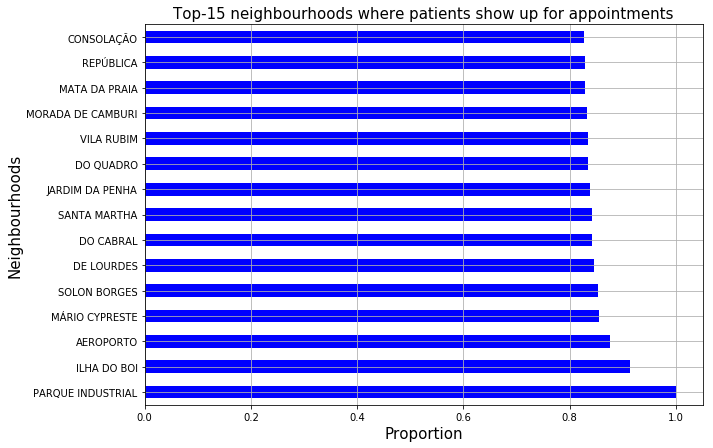

In [38]:
#Top successful appointments
df_locs_3.set_index('neighbourhood').query('no_show == "No"')['proportion'].nlargest(15).plot.barh(figsize = (10,7), color= 'b')
plt.grid()
plt.title('Top-15 neighbourhoods where patients show up for appointments', fontsize = 15)
plt.ylabel('Neighbourhoods', fontsize = 15)
plt.xlabel('Proportion', fontsize = 15)

As earlier mentioned, the neighbourhoods `PARQUE INDUSTRIAL` and `ILHAS OCEANICAS DE TRINDADE` would be neglected in this conclusion due to the limited number of appointments in the neighbourhoods. We see that `ILHA DO BOI` is the neighbourhood where patients are **most likely to show up** for their appointments; followed by the next top 4 neighbourhoods which are `AEROPORTO, MARIO CYPRESTE, MARIO CYPRESTE, SOLON BORGES`.

On the other hand, the neighbourhoods with **top 5 likelihood of patients not showing up** for their appointments are: `SANTOS DUMONT, SANTA CECILIA, SANTA CLARA, ITARARE, JESUS DE NAZARETH.`

## Research Question 3: In which month is the highest number of missed appointments? In which day of the week do patients mostly show up for their appointments?

In [39]:
#extract the appointment weekdays and month
df['appointment_weekday'] = df.appointment_day.apply(lambda x : x.weekday())
df['appointment_month'] = df.appointment_day.apply(lambda x : x.month)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_group,appointment_weekday,appointment_month
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,3,4,4
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,3,4,4
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,3,4,4
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4,4
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,3,4,4


5    80841
6    26450
4     3235
Name: appointment_month, dtype: int64


Text(0,0.5,'Num of appointments')

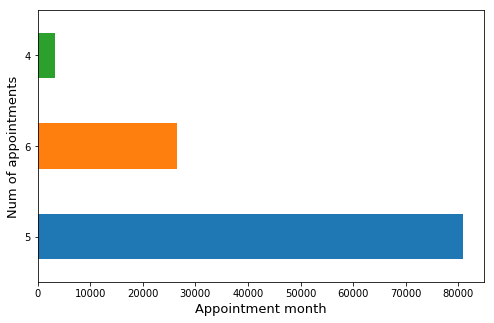

In [40]:
month_totals = df.appointment_month.value_counts()
print(month_totals)
month_totals.plot.barh(figsize = (8,5));
plt.xlabel('Appointment month', fontsize = 13)
plt.ylabel('Num of appointments', fontsize = 13)

In [41]:
#get number of appointment in each subgroup
month_noshow = df.groupby(['appointment_month', 'no_show']).appointment_id.count()
month_noshow

appointment_month  no_show
4                  No          2602
                   Yes          633
5                  No         64037
                   Yes        16804
6                  No         21568
                   Yes         4882
Name: appointment_id, dtype: int64

Text(0,0.5,'Number of appointments')

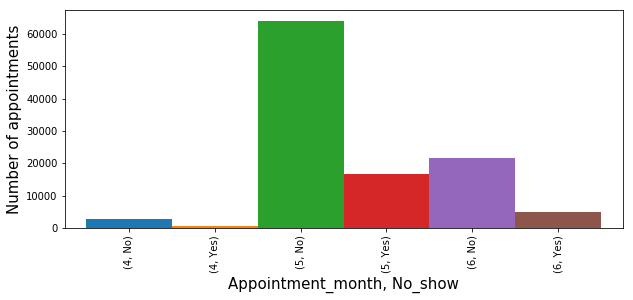

In [42]:
month_noshow.plot(kind= 'bar', figsize=(10,4), width = 1)
plt.xlabel('Appointment_month, No_show', fontsize = 15)
plt.ylabel('Number of appointments', fontsize = 15)
# plt.xticks( ['April Succ. Appointment', '1', '2', '3'])

The highest number of scheduled appointment was recorded in `May`. This also reflect in the number of no-shows recorded in each of the month; highest recorded in `May`. We consider the proportion of total appointments in each month are no-show to get the month with the highest likelihood of patients failing to showup for their appointments. Next, compute the proportions and visualize the result.

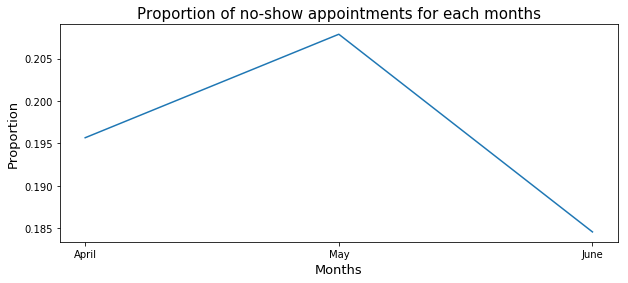

In [43]:
#what proportion of no-show appointments in each month and plot to compare
prop = month_noshow.loc[:,"Yes"]/month_totals
prop.plot(kind= 'line', figsize=(10,4));
plt.xlabel('Months', fontsize = 13);
plt.ylabel('Proportion', fontsize = 13);
plt.title('Proportion of no-show appointments for each months', fontsize = 15);
plt.xticks([4,5,6],['April', 'May', 'June']);

Eventhough the proportions are close, the month where patients have the highest likelihood of failing to show up for their meeting is `May`. Next, we consider the question about the day of the week where patients are most likely to not show up. Similar steps used for the month are repeated again.

2    25867
1    25640
0    22714
4    19019
3    17247
5       39
Name: appointment_weekday, dtype: int64


Text(0,0.5,'Num of appointments')

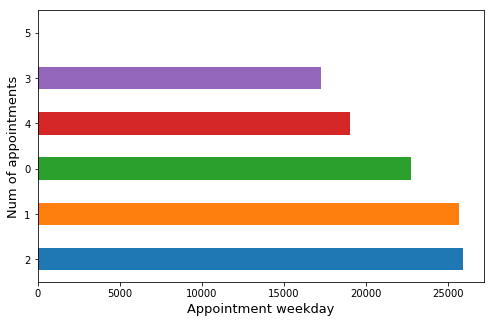

In [44]:
#get the appointments in each weekday
weekday_totals = df.appointment_weekday.value_counts()
print(weekday_totals)
weekday_totals.plot.barh(figsize = (8,5));
plt.xlabel('Appointment weekday', fontsize = 13)
plt.ylabel('Num of appointments', fontsize = 13)

In [45]:
#get appointment in each weekday that were no-show and otherwise
weekday_noshow = df.groupby(['appointment_weekday', 'no_show']).appointment_id.count()
weekday_noshow

appointment_weekday  no_show
0                    No         18024
                     Yes         4690
1                    No         20488
                     Yes         5152
2                    No         20774
                     Yes         5093
3                    No         13909
                     Yes         3338
4                    No         14982
                     Yes         4037
5                    No            30
                     Yes            9
Name: appointment_id, dtype: int64

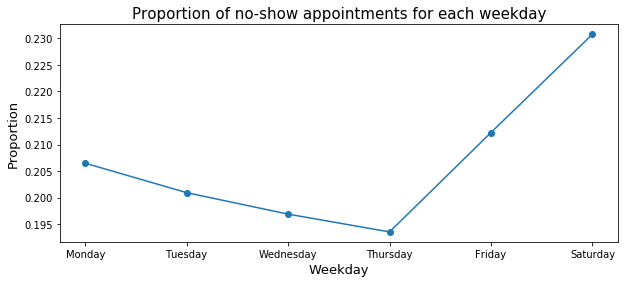

In [46]:
#what proportion of appointments is no-show
prop = weekday_noshow.loc[:,"Yes"]/weekday_totals
prop.plot(kind= 'line', figsize=(10,4), marker = 'o');
plt.xlabel('Weekday', fontsize = 13);
plt.ylabel('Proportion', fontsize = 13);
plt.title('Proportion of no-show appointments for each weekday', fontsize = 15);
plt.xticks(np.arange(6),['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']);

Patients are most likely to show up for their appointments on `Thursdays`. On the other hand, they are mostlikely to not show up on `Saturdays`; also there are few appointments on saturdays. Some reasons for this might be deducible from the data. Maybe only a few clinics take appointments on saturdays? or maybe only people with critical health issues take appointments on Saturdays?. We look briefly into this now.

In [47]:
#why high no-show on saturdays
df_saturday = df.query('appointment_weekday == 5')
df_saturday.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_group,appointment_weekday,appointment_month
72295,9656743739937,5647188,F,2016-05-02 13:08:18,2016-05-14,60,SANTO ANTÔNIO,0,0,0,0,0,1,No,3,5,5
72296,261246839673951,5692771,M,2016-05-12 16:13:24,2016-05-14,56,CARATOÍRA,0,0,0,0,0,0,Yes,3,5,5
72297,62197183951413,5668696,F,2016-05-06 09:35:30,2016-05-14,27,CARATOÍRA,1,0,0,0,0,1,No,2,5,5
72298,1715927721832,5646878,M,2016-05-02 12:02:42,2016-05-14,75,CARATOÍRA,0,1,1,0,0,0,No,4,5,5
72299,61824462897921,5673055,F,2016-05-09 08:50:55,2016-05-14,67,CARATOÍRA,0,0,0,0,0,1,No,3,5,5


In [48]:
#how many clinics open on Saturdays?
df_saturday.neighbourhood.nunique()

4

In [49]:
df_saturday.neighbourhood.value_counts()

CARATOÍRA              30
ARIOVALDO FAVALESSA     5
SANTO ANTÔNIO           3
DO QUADRO               1
Name: neighbourhood, dtype: int64

Only 4 clinics/hospitals take appointments on Saturdays, and even the bulk of the appointments are made to `CARATOÍRA`. Having just 4 out of 81 facilities opened on saturday is likely to be a reason for low appointments and invariably high no-show appointments

In [50]:
#make a column to identify if a patient has a condition or not
df['conditions'] = df.handcap + df.hipertension + df.alcoholism + df.diabetes
df.conditions = df['conditions'].apply(lambda x : 1 if x > 0 else 0)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_group,appointment_weekday,appointment_month,conditions
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,3,4,4,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,3,4,4,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,3,4,4,0
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4,4,0
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,3,4,4,1


In [51]:
#count number of patient appointments in each (condition-no_show) subgroups
df_saturday = df.query('appointment_weekday == 5')
df_saturday_counts = df_saturday.groupby(['no_show', 'conditions']).appointment_id.count()
df_saturday_counts

no_show  conditions
No       0             12
         1             18
Yes      0              5
         1              4
Name: appointment_id, dtype: int64

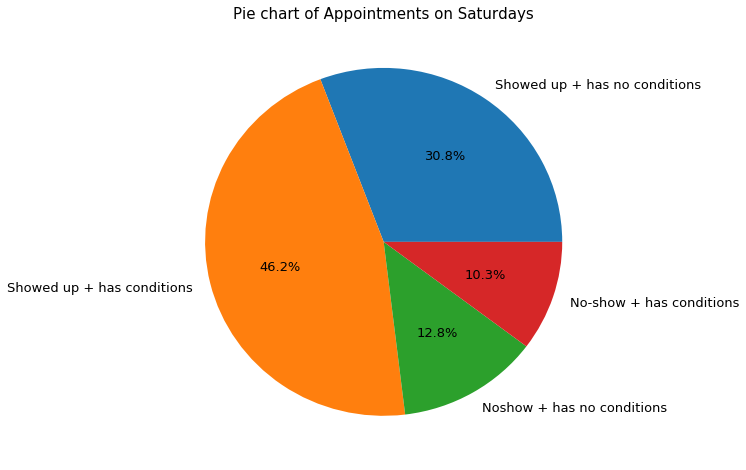

In [52]:
#visualize the distribution of saturday appointments
df_saturday_counts.plot.pie(figsize = (8,8), labels = ['Showed up + has no conditions', 'Showed up + has conditions',
                  'Noshow + has no conditions', 'No-show + has conditions'],  autopct='%1.1f%%', fontsize = 13);
plt.title('Pie chart of Appointments on Saturdays', fontsize = 15)
plt.ylabel('');

The proportions of patients with conditions (alcoholism, diabetes, hipertension, handcap) who schedule appointments for `Saturdays` are over 56\% (that is 46.2% + 10.3%). This is likely a pointer that patients only make appointments when it is necessary during the weekends. In the next question, we would check how much these conditions generally influence whether a patient would show up or not.

## Research Question 4: Do people with health conditions such as hypertension, diabetes etc show up more frequently for their medical appointments?

In [53]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show', 'age_group', 'appointment_weekday', 'appointment_month',
       'conditions'],
      dtype='object')

In [54]:
#get number of data in each health condition category
####no_show == 0###  
nhypertension = df.query('hipertension == 1 & no_show == "No"').shape[0]
ndiabetes = df.query('diabetes == 1 & no_show == "No"').shape[0]
nalcohol = df.query('alcoholism == 1 & no_show == "No"').shape[0]
nhandicap = df.query('handcap > 0 & no_show == "No"').shape[0]

####totals####
nhypertension1 = df.query('hipertension == 1').shape[0]
ndiabetes1 = df.query('diabetes == 1').shape[0]
nalcohol1 = df.query('alcoholism == 1').shape[0]
nhandicap1 = df.query('handcap == 1').shape[0]

Text(0.5,1,'Proportion of patients with conditions who showed up')

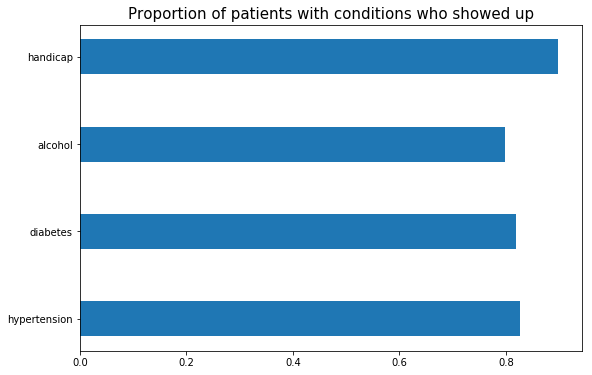

In [55]:
ind = np.array([0,2,4,6])
width = 0.8
plt.figure(figsize=(9, 6))
plt.barh(ind, np.array([nhypertension, ndiabetes, nalcohol, nhandicap])/np.array([nhypertension1, ndiabetes1, nalcohol1, nhandicap1]));
plt.yticks(ind, ['hypertension', 'diabetes', 'alcohol', 'handicap']);
plt.legend()
plt.title('Proportion of patients with conditions who showed up', fontsize = 15)

It is seen that patients with medical condition are more likely to show up for their appointments. We now check for the proportion of people without medical condition who show up.



In [56]:
#get number of data free from each of these health condition categories
####no_show == No###  
nhypertension2 = df.query('hipertension == 0 & no_show == "No"').shape[0]
ndiabetes2 = df.query('diabetes == 0 & no_show == "No"').shape[0]
nalcohol2 = df.query('alcoholism == 0 & no_show == "No"').shape[0]
nhandicap2 = df.query('handcap == 0 & no_show == "No"').shape[0]

####totals####
nhypertension3 = df.query('hipertension == 0').shape[0]
ndiabetes3 = df.query('diabetes == 0').shape[0]
nalcohol3 = df.query('alcoholism == 0').shape[0]
nhandicap3 = df.query('handcap == 0').shape[0]

Text(0.5,1,'Proportion of patients with conditions who showed up')

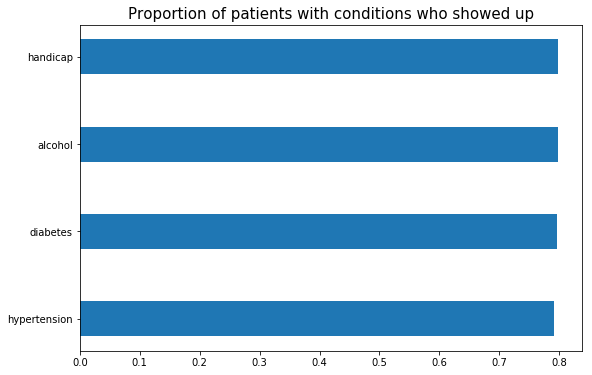

In [57]:
ind = np.array([0,2,4,6])
width = 0.8
plt.figure(figsize=(9, 6))
plt.barh(ind, np.array([nhypertension2, ndiabetes2, nalcohol2, nhandicap2])/np.array([nhypertension3, ndiabetes3, nalcohol3, nhandicap3]));
plt.yticks(ind, ['hypertension', 'diabetes', 'alcohol', 'handicap']);
plt.legend()
plt.title('Proportion of patients with conditions who showed up', fontsize = 15)

There is also a pretty impressive proportion of 'showing up' patients among those feed of the conditions. We put these plot together for comparison.

Text(0.5,1,'Proportion of patients with conditions who showed up')

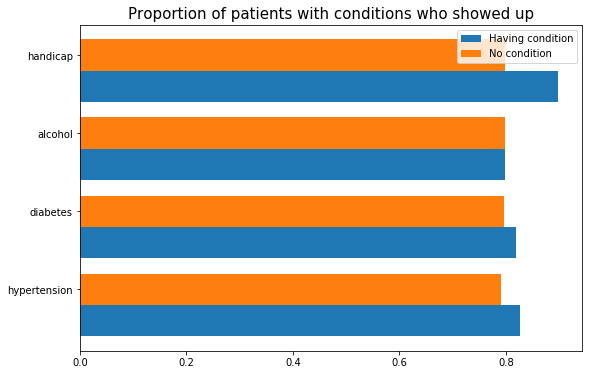

In [58]:
ind = np.array([0,2,4,6])
width = 0.8
plt.figure(figsize=(9, 6))
plt.barh(ind, np.array([nhypertension, ndiabetes, nalcohol, nhandicap])/np.array([nhypertension1, ndiabetes1, nalcohol1, nhandicap1]), label = 'Having condition');
plt.barh(ind+width, np.array([nhypertension2, ndiabetes2, nalcohol2, nhandicap2])/np.array([nhypertension3, ndiabetes3, nalcohol3, nhandicap3]), label= 'No condition');
plt.yticks(ind+width, ['hypertension', 'diabetes', 'alcohol', 'handicap']);
plt.legend()
plt.title('Proportion of patients with conditions who showed up', fontsize = 15)

The chart shows the patients living with conditions such as `handcap, diabetes, hypertension` have a higher tendency of showing up for medical appointments. Meanwhile, it seems having alcohol addiction doesnt influence the decision to show for a medical appointment or not.

<a id='conclusions'></a>
## Conclusions

Below are the summaries of conclusions derived from the data analysis:
* In this analysis, the ages were grouped into 5 groups: ` Children: 0-12, Teenages: 13-19, Youths: 20-39, Adults: 40-69, Seniors: >69`. It was found that the Teenagers are most likely to not show up for appointments, while Seniors have higher tendencies for showing up for their appointments.
- Having recognized the uniqueness of `PARQUE INDUSTRIAL` and `ILHAS OCEANICAS DE TRINDADE` due to extremely limited data, we concluded that the top neighbourhoods where patient would mostlikey show up for their appointments are: `ILHA DO BOI`,`AEROPORTO, MARIO CYPRESTE, MARIO CYPRESTE, SOLON BORGES`. Meanwhile, there is a higher chance for no-show at `SANTOS DUMONT, SANTA CECILIA, SANTA CLARA, ITARARE, JESUS DE NAZARETH.`
- Analysing to see if time is a factor which influence patients' decision, we found the the month with the high proportion of no-show appointments was `May`; the highest number of appointments was recorded in this same month. Furthermore, `saturdays` were found to be the week day with the highest no-show appointments despite having lowest appointment. We deduced that this might be because only 4 clinic seems to operate on saturdays. We also got a possible indication that patients only make appointments when it is necessary on weekends
- We observed that `handcap, diabetes and hypertension` have the tendency of influencing a patient's decision to show up for their appointments.

## Submitting your Project 

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0